In [1]:
import bamboolib as bam 
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [36]:
y=pd.read_excel(r'C:\\Quarter 1\\6020 Predictive analysis\\Module 3 Binary Classification\\\marketing_campaign.xlsx'
                ,engine='openpyxl')

In [37]:
y = y.loc[~(y['Year_Birth'] < 1940)]
y = y.drop(columns=['Z_CostContact', 'Z_Revenue'])
y = y.loc[~(y['Income'] > 200000)]

<AxesSubplot:xlabel='Income'>

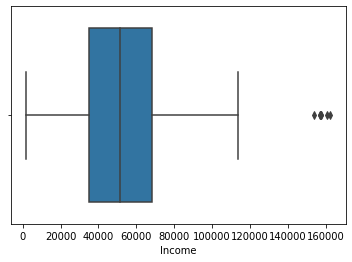

In [38]:
sns.boxplot(y.Income)

<AxesSubplot:xlabel='Income'>

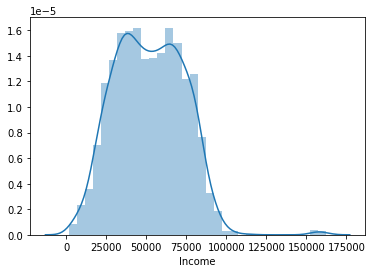

In [39]:
sns.distplot(y.Income)

In [40]:
y['Income'].fillna(y['Income'].mean(),inplace=True)
y['Dt_Customer'] = pd.to_datetime(y['Dt_Customer'], format='%Y-%m-%d')
y['Dt_Customer']=pd.DatetimeIndex(y['Dt_Customer']).date
y['Dt_Date'] = pd.DatetimeIndex(y['Dt_Customer']).day
y['Dt_Year'] = pd.DatetimeIndex(y['Dt_Customer']).year
y['Dt_Month'] = pd.DatetimeIndex(y['Dt_Customer']).month
#y = pd.get_dummies(y, columns=['Education'], drop_first=False, dummy_na=False)
y = y.drop(columns=['Dt_Customer'])
y = pd.get_dummies(y, columns=['Marital_Status', 'Education'], drop_first=False, dummy_na=False)
y

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD
0,5524,1957,58138.0,0,0,58,635,88,546,172,...,0,1,0,0,0,0,0,1,0,0
1,2174,1954,46344.0,1,1,38,11,1,6,2,...,0,1,0,0,0,0,0,1,0,0
2,4141,1965,71613.0,0,0,26,426,49,127,111,...,0,0,1,0,0,0,0,1,0,0
3,6182,1984,26646.0,1,0,26,11,4,20,10,...,0,0,1,0,0,0,0,1,0,0
4,5324,1981,58293.0,1,0,94,173,43,118,46,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,61223.0,0,1,46,709,43,182,42,...,1,0,0,0,0,0,0,1,0,0
2236,4001,1946,64014.0,2,1,56,406,0,30,0,...,0,0,1,0,0,0,0,0,0,1
2237,7270,1981,56981.0,0,0,91,908,48,217,32,...,0,0,0,0,0,0,0,1,0,0
2238,8235,1956,69245.0,0,1,8,428,30,214,80,...,0,0,1,0,0,0,0,0,1,0


In [41]:
y_logr=y[['Response']]
x_logr=y.drop(['Response'],axis=1)

from sklearn.model_selection import train_test_split
x_train, x_test, z_train, z_test = train_test_split(x_logr, y_logr, test_size=0.20)

In [42]:
import statsmodels.api as sm


Xlog2 = sm.add_constant(x_train) 
logr_model = sm.Logit(z_train, Xlog2) 
logr_fit = logr_model.fit()
print(logr_fit.summary())

         Current function value: 0.256017
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:               Response   No. Observations:                 1788
Model:                          Logit   Df Residuals:                     1750
Method:                           MLE   Df Model:                           37
Date:                Sun, 30 Jan 2022   Pseudo R-squ.:                  0.4075
Time:                        01:38:25   Log-Likelihood:                -457.76
converged:                      False   LL-Null:                       -772.59
Covariance Type:            nonrobust   LLR p-value:                6.826e-109
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    2346.6478   5.37e+06      0.000      1.000   -1.05e+07    1.05e+07
ID                      -8

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

logreg = LogisticRegression()

logreg.fit(x_train,z_train)


z_pred=logreg.predict(x_test)
cnf_matrix = confusion_matrix(z_test, z_pred)
print(cnf_matrix)
classification_report=classification_report(z_test, z_pred)
print(classification_report)

[[380  12]
 [ 52   4]]
              precision    recall  f1-score   support

           0       0.88      0.97      0.92       392
           1       0.25      0.07      0.11        56

    accuracy                           0.86       448
   macro avg       0.56      0.52      0.52       448
weighted avg       0.80      0.86      0.82       448



In [49]:
logreg.score(x_test, z_test)


0.8571428571428571

In [45]:
from sklearn import svm
from sklearn import metrics 

svm_model = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
svm_model.fit(x_train, z_train)

#Predict the response for test dataset
z_pred = svm_model.predict(x_test)
cnf_matrix = metrics.confusion_matrix(z_test, z_pred)
print(cnf_matrix)

[[386   6]
 [ 47   9]]


In [50]:
classification_report=metrics.classification_report(z_test, z_pred)
print(classification_report)

              precision    recall  f1-score   support

           0       0.89      0.98      0.94       392
           1       0.60      0.16      0.25        56

    accuracy                           0.88       448
   macro avg       0.75      0.57      0.59       448
weighted avg       0.86      0.88      0.85       448



In [51]:
svm_model.score(x_test, z_test)

0.8816964285714286